<a href="https://colab.research.google.com/github/JAK0707/ELC-Activity/blob/main/Jaiditya_ELC_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2       #importing computer vision library
import PIL       #python imaging library
import numpy as np     #numerical operations
from matplotlib import pyplot as plt     #visualization library in python for 2D plots
from PIL import Image       #opening, rotating and displaying an image
from matplotlib import image as mpimg    #image read and image show function


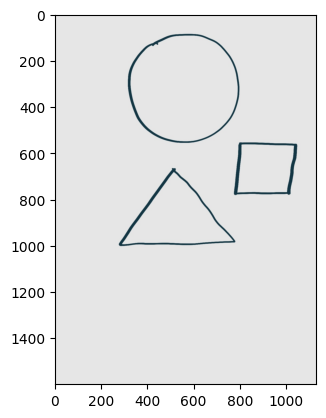

In [2]:
img=Image.open("8.jpeg")
plt.imshow(img)

In [3]:
print(img.format)
print(img.size)
print(img.mode)

JPEG
(1131, 1600)
RGB


In [4]:
img=np.array(img)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

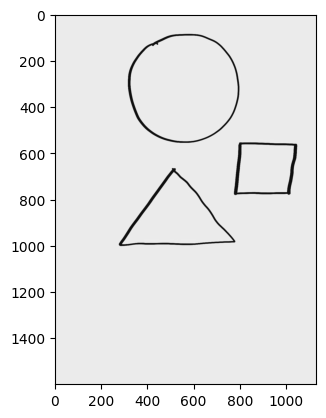

In [5]:
plt.imshow(gray,cmap='gray')

In [6]:
_,threshold=cv2.threshold(gray,110,255,cv2.THRESH_BINARY_INV)

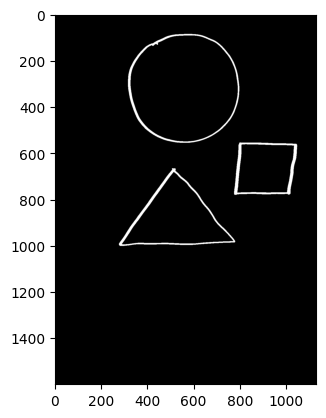

In [7]:
plt.imshow(threshold, cmap='gray')

In [8]:
#Different kernel matrices for morphological operations.
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(4,4))
kernelc=cv2.getStructuringElement(cv2.MORPH_RECT,(6,6))
kernelo=cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))


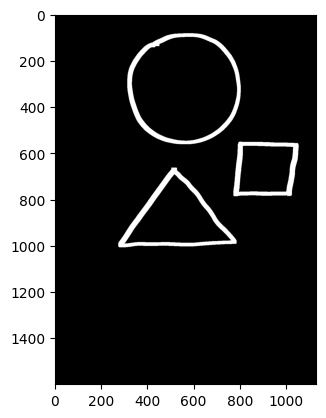

In [9]:
#Dilation on threshold image output
dilated=cv2.dilate(threshold,kernel,iterations=3)
plt.imshow(dilated,cmap='gray')

In [10]:
#connection of disjoining edges in the shape.
closed=cv2.morphologyEx(dilated,cv2.MORPH_CLOSE,kernelc, iterations=3)

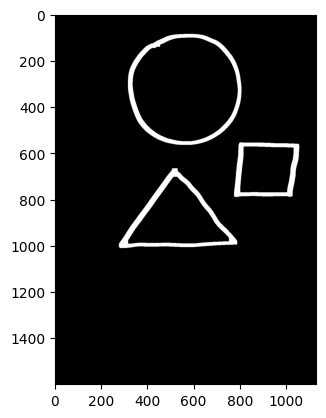

In [11]:
plt.imshow(closed, cmap='gray')

In [12]:
opening=cv2.morphologyEx(closed,cv2.MORPH_OPEN,kernelo, iterations=5)

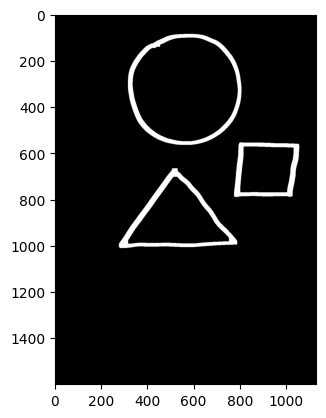

In [13]:
plt.imshow(opening, cmap='gray')

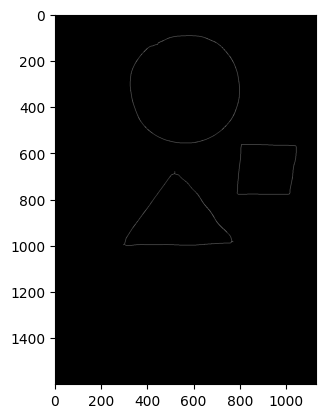

In [14]:
thinned=cv2.ximgproc.thinning(opening)
plt.imshow(thinned,cmap='gray')

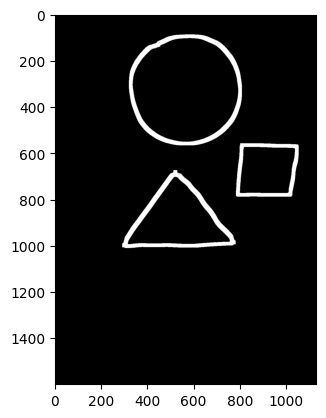

In [15]:
dilated_t=cv2.dilate(thinned, kernel, iterations=5)
plt.imshow(dilated_t, cmap='gray')

In [16]:
contours, _=cv2.findContours(dilated_t, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [17]:
i=0
#list for storing names of shapes
for contour in contours:

        #here we are ignoring first counter because
        #findcontour function detects whole image as shape
        if i== 0:
          i=1
          continue
        approx=cv2.approxPolyDP(
            contour, 0.02*cv2.arcLength(contour, True), True)
#to draw contours over the image
        cv2.drawContours(img, [contour], 0, (0,0,255), 2)

        #centroid of each of the shape.
        M = cv2.moments(contour)
        if M['m00'] != 0.0:
           x=int(M['m10']/M['m00'])
           y=int(M['m01']/M['m00'])
        # put name of shape
        if len(approx)==3:
          cv2.putText(img,'Triangle',(x,y),cv2.FONT_HERSHEY_SIMPLEX,2,(255,0,0),5)
        elif len(approx) == 4:
          cv2.putText(img, 'Rectangle', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255, 0), 5)
        elif len(approx) == 5:
          cv2.putText(img, 'Pentagon', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255, 0), 5)
        elif len(approx) == 6:
          cv2.putText(img, 'Hexagon', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255, 0), 5)
        else:
          cv2.putText(img, 'circle', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255, 0), 5)


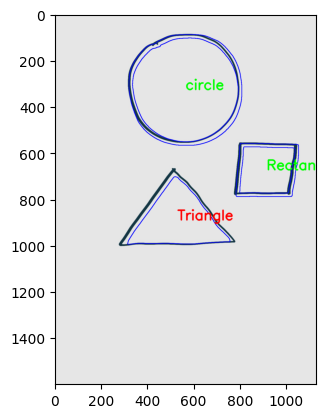

In [18]:
plt.imshow(img)


#Jaiditya Abhineet Kapoor